# Lab 5.6a

Goals:
 
* Produce visualizations of two-variable functions using a color map.
* Draw vectors on an axis.
* Use gradient ascent to find local maximums.
* Discover the relationship between starting points, parameters, and the output of gradient ascent.





Libraries!


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

You'll be working with a function whose maximums and minimums are harder to solve for numerically.  Pick one of the functions below to work with.  You should pick a different function than your groupmates.

In [46]:
def f1(x,y): # Saanvi
  return np.sin(x)+np.sin(2*x+y)

def f2(x,y): # Asuka
  return np.cos(x)+np.sin(x-2*y)

def f3(x,y): # Carol
  return np.sin(x)+np.cos(3*x+y)

def f4(x,y):
  return np.cos(y)+np.sin(x+3*y)

def f5(x,y):
  return np.cos(x)+np.sin(2*x+y)


# Questions
Write answers to these questions using code and text blocks.  When you are satisfied, download and submit an .ipynb file to Canvas.

## Q1

* Produce a nice colormapped diagram of your function on the domain $-6\leq x\leq 6$ and $-4\leq y\leq 4$.  Make sure you label your diagram, and correctly scale and orient your axes.

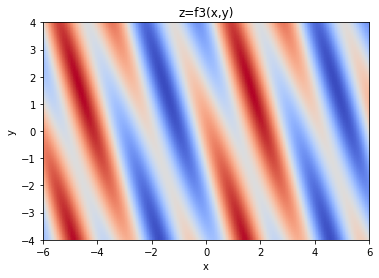

In [47]:
xvalues=np.arange(-6,6,0.1)
yvalues=np.arange(-4,4,0.1)
x,y=np.meshgrid(xvalues,yvalues)
z=f3(x,y)
ax=plt.axes(xlim=[-6,6], ylim=[-4,4])
ax.set_title('z=f3(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.imshow(z, origin='lower', extent=(-6,6,-4,4), cmap='coolwarm')

## Q2

* Define a function `df(x,y)` that returns the gradient vector of your function at `(x,y)`.  
* Copy your `ascent()` function from the prelab.
* Pick a point not especially close to a local maximum as an initial guess. 
* Produce a visualization of a gradient ascent that approaches a local maximum.  You will need to experiment with `alpha` and `n` to get a nice ascent. 
* If your gradient ascent heads outside the graph, feel free to adjust the domain you show.


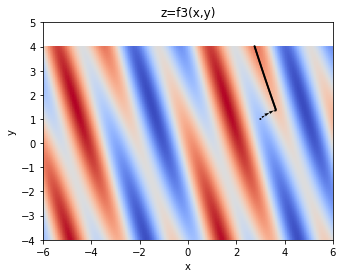

In [48]:
def df(x,y):
  return (np.cos(x)-np.sin(3*x+y)*3,-np.sin(3*x+y))
def ascent(x,y,dg,alpha,n):
  for i in range(n):
    ax.quiver(x,y,alpha*dg(x,y)[0],alpha*dg(x,y)[1],angles='xy',scale_units='xy', scale=1)
    x=x+alpha*dg(x,y)[0]
    y=y+alpha*dg(x,y)[1]
  return (x,y)
xvalues=np.arange(-6,6,0.1)
yvalues=np.arange(-4,4,0.1)
x,y=np.meshgrid(xvalues,yvalues)
z=f3(x,y)
ax=plt.axes(xlim=[-6,6], ylim=[-4,5])
ax.set_title('z=f3(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ascent(3,1,df,0.1,90)
ax.imshow(z, origin='lower', extent=(-6,6,-4,4), cmap='coolwarm')

## Q3

* What downsides are there to using too small an $\alpha$?  Explain in a couple sentences and illustrate with an example.
* What downsides are there to using too large an $\alpha$?  Explain in a couple sentences and illustrate with an example.


Using a small alpha will require more steps and take a longer time to converge. For example, if the alpha is 0.001, with n = 86, the gradient ascent barely converges to the local maximum. Changing n = 8600, it will take a longer time to calculate and show the visualization of a gradient ascent that approaches a local maximum.

Moreover, if there are multiple local maximums near each other, the gradient ascent will converge to whichever maximum that is closest to the point we picked. For example, for function 3, (2,3.5) is between 2 maximums but closers to the maximum on the right, so it converges to the right eventually.

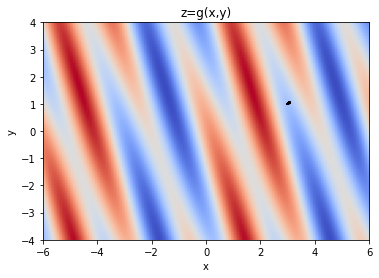

In [49]:
xvalues=np.arange(-6,6,0.1)
yvalues=np.arange(-4,4,0.1)
x,y=np.meshgrid(xvalues,yvalues)
z=f3(x,y)
ax=plt.axes(xlim=[-6,6], ylim=[-4,4])
ax.set_title('z=g(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ascent(3,1,df,0.001,86)
ax.imshow(z, origin='lower', extent=(-6,6,-4,4), cmap='coolwarm')

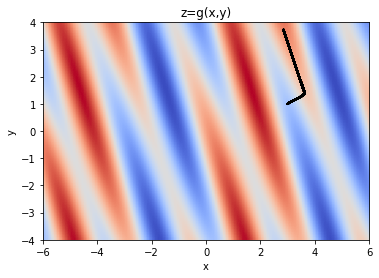

In [50]:
xvalues=np.arange(-6,6,0.1)
yvalues=np.arange(-4,4,0.1)
x,y=np.meshgrid(xvalues,yvalues)
z=f3(x,y)
ax=plt.axes(xlim=[-6,6], ylim=[-4,4])
ax.set_title('z=g(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ascent(3,1,df,0.001,8600)
ax.imshow(z, origin='lower', extent=(-6,6,-4,4), cmap='coolwarm')

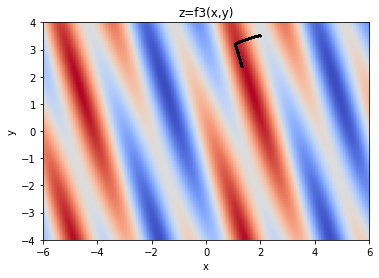

In [51]:
xvalues=np.arange(-6,6,0.1)
yvalues=np.arange(-4,4,0.1)
x,y=np.meshgrid(xvalues,yvalues)
z=f3(x,y)
ax=plt.axes(xlim=[-6,6], ylim=[-4,4])
ax.set_title('z=f3(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ascent(2,3.5,df,0.001,8600)
ax.imshow(z, origin='lower', extent=(-6,6,-4,4), cmap='coolwarm')

Using a large alpha will make the gradient ascent overshoot and never converges. For example, when alpha = 1, the gradient ascent never converges. 

Even if we do converge, using a large alpha will make the gradient ascent bounce back and forth, which may require more steps. For example, when alpha = 0.4, the gradient ascent went back and forth but eventually did converge.

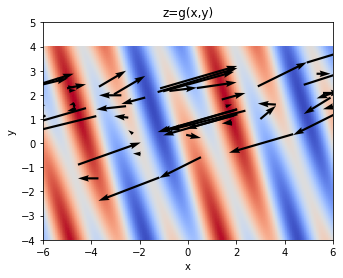

In [52]:
xvalues=np.arange(-6,6,0.1)
yvalues=np.arange(-4,4,0.1)
x,y=np.meshgrid(xvalues,yvalues)
z=f3(x,y)
ax=plt.axes(xlim=[-6,6], ylim=[-4,5])
ax.set_title('z=g(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ascent(3,1,df,1,86)
ax.imshow(z, origin='lower', extent=(-6,6,-4,4), cmap='coolwarm')

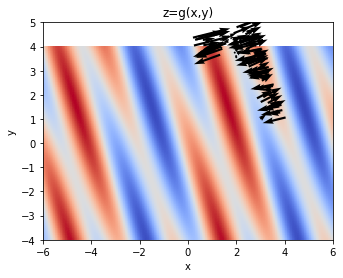

In [53]:
xvalues=np.arange(-6,6,0.1)
yvalues=np.arange(-4,4,0.1)
x,y=np.meshgrid(xvalues,yvalues)
z=f3(x,y)
ax=plt.axes(xlim=[-6,6], ylim=[-4,5])
ax.set_title('z=g(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ascent(3,1,df,0.4,86)
ax.imshow(z, origin='lower', extent=(-6,6,-4,4), cmap='coolwarm')

## Q4 

* What determines which maximum a gradient ascent will approach (assuming a reasonable choice of $\alpha$)?  Can you give examples of two nearby points that approach two different maximums?



The initial point we choose will determine which maximum the gradient ascent will approach. Since the point indicates the start point of the gradient, if the point is between multiple maximums, with a reasonable alpha, the gradient ascent will converge to the maximum that it first points toward.

The 2 nearby points that approach 2 different maximums are (3,1) and (3,0.7).

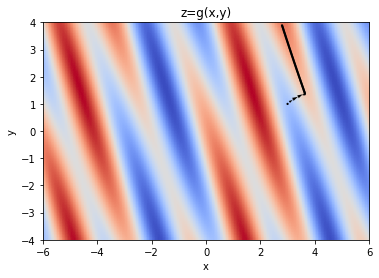

In [54]:
xvalues=np.arange(-6,6,0.1)
yvalues=np.arange(-4,4,0.1)
x,y=np.meshgrid(xvalues,yvalues)
z=f3(x,y)
ax=plt.axes(xlim=[-6,6], ylim=[-4,4])
ax.set_title('z=g(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ascent(3,1,df,0.1,86)
ax.imshow(z, origin='lower', extent=(-6,6,-4,4), cmap='coolwarm')

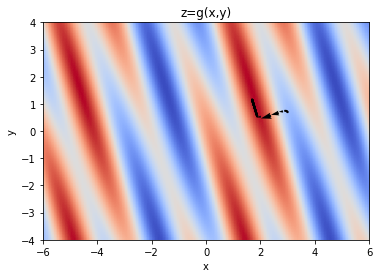

In [55]:
xvalues=np.arange(-6,6,0.1)
yvalues=np.arange(-4,4,0.1)
x,y=np.meshgrid(xvalues,yvalues)
z=f3(x,y)
ax=plt.axes(xlim=[-6,6], ylim=[-4,4])
ax.set_title('z=g(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ascent(3,0.7,df,0.1,100)
ax.imshow(z, origin='lower', extent=(-6,6,-4,4), cmap='coolwarm')

## Q5

* How would you modify gradient ascent to find a local minimum instead?  
* Demonstrate.



We can change the "+" to "-" in the ascent for loop for x and y.

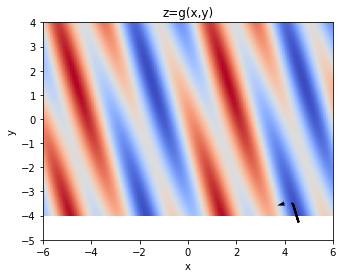

In [56]:
def df(x,y):
  return (np.cos(x)-np.sin(3*x+y)*3,-np.sin(3*x+y))
def ascent(x,y,dg,alpha,n):
  for i in range(n):
    ax.quiver(x,y,alpha*dg(x,y)[0],alpha*dg(x,y)[1],angles='xy',scale_units='xy', scale=1)
    x=x-alpha*dg(x,y)[0]
    y=y-alpha*dg(x,y)[1]
  return (x,y)
xvalues=np.arange(-6,6,0.1)
yvalues=np.arange(-4,4,0.1)
x,y=np.meshgrid(xvalues,yvalues)
z=f3(x,y)
ax=plt.axes(xlim=[-6,6], ylim=[-5,4])
ax.set_title('z=g(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ascent(4,-3.5,df,0.1,100)
ax.imshow(z, origin='lower', extent=(-6,6,-4,4), cmap='coolwarm')

## Optional (Programming)

Suppose we have only discreet values of our function.  Say it can only be evaluated at whole tenths of $x$ and $y$ (so (3.1,4) would work but (3.12,7) would not).  Can you reprogram gradient ascent to successfully approximate the necessary derivatives?

In [57]:
def g(x,y):
  if 10*x==floor(10*x) and 10*y==floor(10*y):
    return 16-x**2-y**4
  else:
    print("I can't evaluate the function here")
    return None